In [13]:
from skbio import TabularMSA, DNA, Protein
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming
from skbio.tree import nj

In [31]:
from io import StringIO

In [36]:
msa = TabularMSA.read('Ogg1_aligned.fasta', constructor = DNA)
msa.reassign_index(minter='id')

In [23]:
import numpy as np
from collections import defaultdict
hydrophobicity_idx = defaultdict(lambda: np.nan)
hydrophobicity_idx.update({'A': 0.61, 'L': 1.53, 'R': 0.60, 'K': 1.15, 'N': 0.06, 'M': 1.18, 
                           'D': 0.46, 'F': 2.02, 'C': 1.07, 'P': 1.95, 'Q': 0., 'S': 0.05, 
                           'E': 0.47, 'T': 0.05, 'G': 0.07, 'W': 2.65, 'H': 0.61, 'Y': 1.88, 
                           'I': 2.22, 'V': 1.32})
hydrophobicity_labels=['Hydrophilic', 'Medium', 'Hydrophobic']

In [64]:
nucleotide_idx = defaultdict(lambda: np.nan)
nucleotide_idx.update({'A': 1.0, 'T': 2.0, 'C': 3.0, 'G': 4.0, '-' : 0.00 })
nucleotide_labels=['Gap_A_T', 'T', 'G_C']

In [53]:
nucleotide_idx

defaultdict(<function __main__.<lambda>()>,
            {'A': 0.2, 'T': 0.4, 'C': 0.6, 'G': 0.8, '-': 0.0})

In [65]:
sequence_order = None
if sequence_order is None:
    sequence_order = msa.index

In [66]:
mtx = []
for label in sequence_order:
    seq = str(msa.loc[label])
    mtx.append([nucleotide_idx[aa] for aa in seq])

In [68]:
mtx

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def msa_to_heatmap(msa, value_map, legend_labels=('Low', 'Medium', 'High'), fig_size=(15,10), cmap='YlGn', sequence_order=None):
    """Plot a multiple sequence alignment as a heatmap.
    
    Parameters
    ----------
    msa : skbio.TabularMSA
        The multiple sequence alignment to be plotted
    
    fig_size : tuple, optional
        Size of figure in inches.
    cmap : matplotlib colormap, optional
        See here for choices: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
    sequence_order : iterable, optional
        The order, from top-to-bottom, that the sequences should be plotted in.
    
    Raises
    ------
    KeyError
        If a character in ``msa`` is not in ``value_map``, and ``value_map`` is not a 
        ``collections.defaultdict``.
        
    """
    if sequence_order is None:
        sequence_order = msa.index
            
    # fill a data matrix by iterating over the alignment and mapping
    # characters to values
    mtx = []
    for label in sequence_order:
        seq = str(msa.loc[label])
        mtx.append([value_map[aa] for aa in seq])
        
    # build the heatmap, this code derived from the Matplotlib Gallery
    # http://matplotlib.org/examples/pylab_examples/colorbar_tick_labelling_demo.html
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size)

    cax = ax.imshow(mtx, interpolation='nearest', cmap=cmap)

    # Add colorbar and define tick labels
    values = list(value_map.values())
    cbar = fig.colorbar(cax, 
                        ticks=[min(values), 
                               np.nanmedian(values),
                               max(values)],
                        orientation='horizontal')
    ax.set_yticks([0] + list(range(3, msa.shape.sequence - 3, 3)) + [msa.shape.sequence - 1])
    ax.set_yticklabels(sequence_order)
    ax.set_xticks(range(msa.shape.position))
    ax.set_xticklabels(msa.consensus(), size=7)
    cbar.ax.set_xticklabels(legend_labels) # horizontal colorbar

TypeError: Image data of dtype object cannot be converted to float

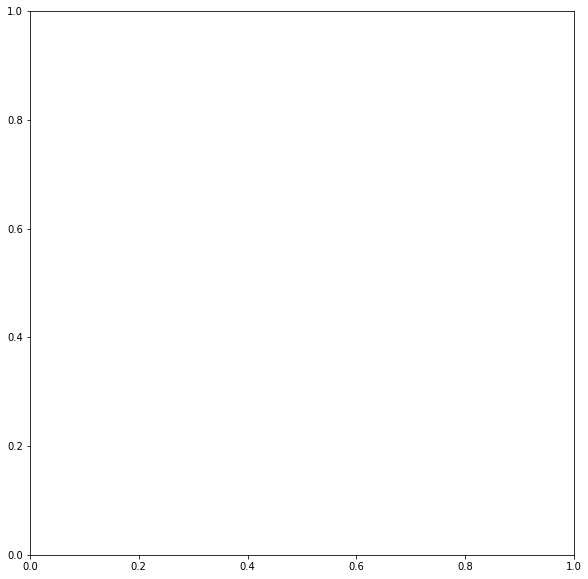

In [50]:
msa_to_heatmap(msa, nucleotide_idx, legend_labels=nucleotide_labels)